## 0.0 Imports

In [57]:
import pandas as pd
import inflection
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
from IPython.display import Image

## 0.1. Helper Function

In [58]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 8]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [59]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1. Loading Data

In [60]:
df_train_raw = pd.read_csv('data/train.csv', low_memory=False)

In [61]:
df_train_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [62]:
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

In [63]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [64]:
# merge dataframes
df_raw = pd.merge(df_train_raw, df_store_raw, how='left', on='Store')
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 2. Data Description

In [65]:
# create a copy to create a checkpoint
df_dd = df_raw.copy()

## 2.1. Rename Columns

In [66]:
old_cols_name = list(df_dd.columns) 
snake_case_func = lambda x: inflection.underscore(x)
new_cols_name = list(map(snake_case_func, old_cols_name))
df_dd.columns = new_cols_name

## 2.2. Data Dimension

In [67]:
print(f'Number of rows: {df_dd.shape[0]}')
print(f'Number of columns: {df_dd.shape[1]}')

Number of rows: 1017209
Number of columns: 18


## 2.3. Data Types

In [68]:
df_dd.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [69]:
df_dd.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [70]:
# change data type for the field date, from object to datetime
df_dd['date'] = pd.to_datetime(df_dd['date'])
df_dd.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [71]:
df_dd.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 2.4. Check NA

In [72]:
df_dd.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 2.4.1. Fill NA

Let's fill all the NAs using some business assumptions.

#### 2.4.1.1. competition_distance

if NA, means that there is no competitor around, or the nearest competitor is too far away. So, lets fill it with a huge number, way beyond the max found on the dataset

In [73]:
# get max
max = df_dd['competition_distance'].max()
max

75860.0

In [74]:
df_dd['competition_distance'].fillna(200000, inplace=True)

with apply and math.isnan() = 303ms

#### 2.4.1.2. competition_open_since_month and competition_open_since_year

if NA, fill with the date of the sale, as it is ilogical to have a competitor nearby but no date of its opening

In [75]:
df_dd['competition_open_since_month'].fillna(df_dd['date'].dt.month, inplace=True)
df_dd['competition_open_since_year'].fillna(df_dd['date'].dt.year, inplace=True)

#### 2.4.1.3. promo2_since_week and promo2_since_year

if NA, also fill with the date of sale. This is a first cycle, maybe we change it later

In [76]:
df_dd['promo2_since_week'].fillna(df_dd['date'].dt.isocalendar().week, inplace=True)
df_dd['promo2_since_year'].fillna(df_dd['date'].dt.year, inplace=True)

#### 2.4.1.4. promo_interval

This columns contains a list of months when the Promo2 is started. We will create a new column called is_promo, to indicate if the sale date is on a month from this list. If promo_interval is NA, fill with 0

In [77]:
month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

df_dd['promo_interval'].fillna(0, inplace=True)

df_dd['date_month'] = df_dd['date'].dt.month.map(month_dict)

df_dd['is_promo'] = df_dd[['promo_interval', 'date_month']].apply(
    lambda x: 
        0 if x['promo_interval'] == 0 else 
        1 if x['date_month'] in x['promo_interval'].split(',') else 0,
    axis=1)

## 2.4.2. Recheck Data Types

Due to the operations we did filling the NAs, we will recheck the data types to see if there is any bad-typed column

In [78]:
df_dd.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
date_month                              object
is_promo                                 int64
dtype: object

In [79]:
# lets change the type of competition_open_since_month, competition_open_since_year, promo2_since_week and promo2_since_year from float64 to int
df_dd['competition_open_since_month'] = df_dd['competition_open_since_month'].astype(int)
df_dd['competition_open_since_year'] = df_dd['competition_open_since_year'].astype(int)
df_dd['promo2_since_week'] = df_dd['promo2_since_week'].astype(int)
df_dd['promo2_since_year'] = df_dd['promo2_since_year'].astype(int)

In [80]:
df_dd.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
date_month                              object
is_promo                                 int64
dtype: object

## 2.5. Descriptive Statistics

In [81]:
# lets first separate the attributes in numerical and categorical
num_attributes = df_dd.select_dtypes(include=['int64', 'float64'])
cat_attributes = df_dd.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 2.5.1. Numerical Attributes

In [82]:
# Central Tendency
ct1 = num_attributes.apply(np.mean)
ct2 = num_attributes.apply(np.median)

# Dispersion
d1 = num_attributes.apply(np.std)
d2 = num_attributes.min()
d3 = num_attributes.max()
d4 = num_attributes.apply(lambda x: x.max() - x.min())
d5 = num_attributes.skew()
d6 = num_attributes.kurtosis()

In [83]:
m = pd.DataFrame([ct1, ct2, d1, d2, d3, d4, d5, d6]).T.reset_index()
m.columns = ['attribute', 'mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']

In [84]:
m

,attribute,mean,median,std,min,max,range,skew,kurtosis
0,store,558.429727,558.0,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,1.997390,1.0,7.0,6.0,0.001593,-1.246873
2,sales,5773.818972,5744.0,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375
3,customers,633.145946,609.0,464.411506,0.0,7388.0,7388.0,1.598650,7.091773
4,open,0.830107,1.0,0.375539,0.0,1.0,1.0,-1.758045,1.090723
5,promo,0.381515,0.0,0.485758,0.0,1.0,1.0,0.487838,-1.762018
6,school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.0,1.677842,0.815154
7,competition_distance,5935.442677,2330.0,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712
8,competition_open_since_month,6.786849,7.0,3.311085,1.0,12.0,11.0,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,5.515591,1900.0,2015.0,115.0,-7.235657,124.071304


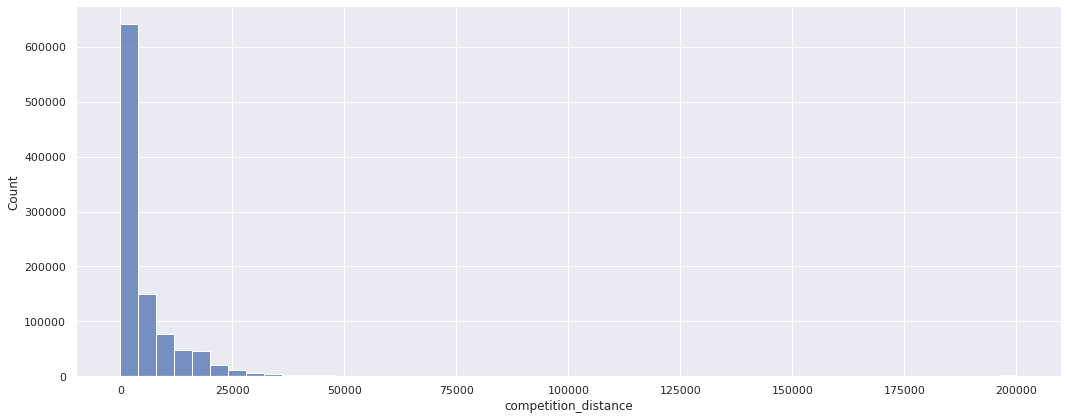

In [85]:
sns.displot(df_dd['competition_distance'], kde=False, height=6, aspect=2.5, bins=50)

### 2.5.2. Categorical Attributes

In [86]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
date_month        12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

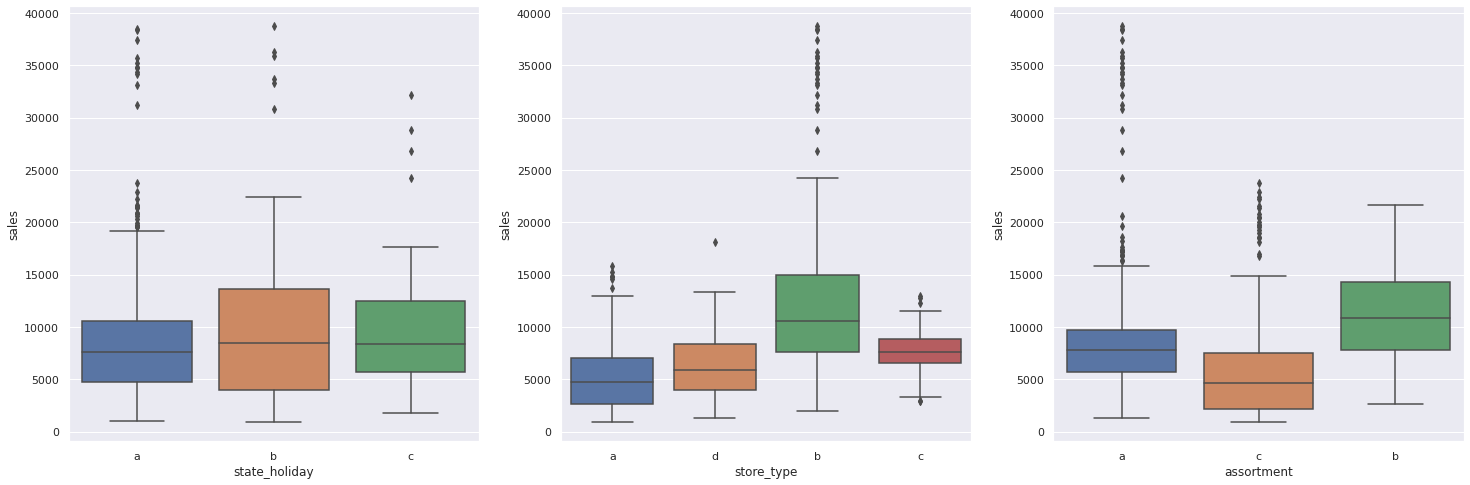

In [87]:
df_dd_aux = df_dd[(df_dd['sales'] > 0) & (df_dd['state_holiday'] != '0')]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=df_dd_aux)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=df_dd_aux)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=df_dd_aux)

# 3. Hypotheses and Feature Engineering

## 3.1. Mind Map of Agents and Agents' Attributes

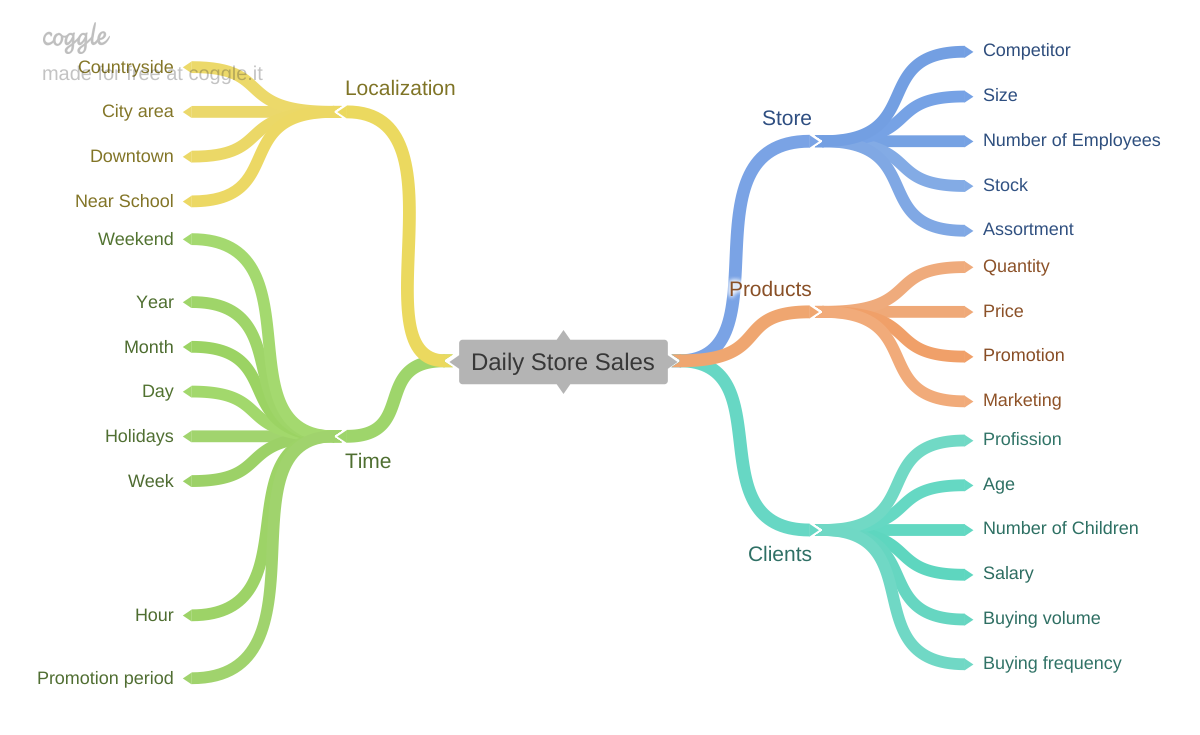

In [88]:
Image('img/mindmap_agents-attributes.png')

## 3.2. Hypotheses Creation

### 3.2.1. Hipotheses - Store

**1.** Stores with more employees should sell more.

**2.** Stores with more stock capacity should sell more.

**3.** Stores with higher size should sell more.

**4.** Stores with more assortment should sell more.

**5.** Stores with more competitors near should sell less.

**6.** Stores with competitors for longer periods should sell more.

### 3.2.2. Hypotheses - Product

**1.** Stores that invest more in marketing for the product should sell more.

**2.** Stores with higher exposure of the product should sell more.

**3.** Stores with products of lower prices should sell more.

**4.** Stores with promotions of higher discounts should sell more.

**5.** Stores with active promotions for longer periods of time should sell more.

**6.** Stores with more days of promotion should sell more.

**7.** Stores with more consecutive promotions should sell more.

### 3.2.3. Hypotheses - Time

**1.** Stores opened during Christmas holiday should sell more.

**2.** Stores should sell more throughout the years.

**3.** Stores should sell more on the second semester of the year.

**4.** Stores should sell more after the 10th day of each month.

**5.** Stores should sell less on weekends.

**6.** Stores should sell less during school holidays.

## 3.3. Final List of Hypotheses

After writing the hypotheses we can think, we prioritize and select those that we can validate with the available data

**1.** Stores with more assortment should sell more.

**2.** Stores with more competitors near should sell less.

**3.** Stores with competitors for longer periods should sell more.

**4.** Stores with active promotions for longer periods of time should sell more.

**5.** Stores with more days of promotion should sell more.

**6.** Stores with more consecutive promotions should sell more.

**7.** Stores opened during Christmas holiday should sell more.

**8.** Stores should sell more throughout the years.

**9.** Stores should sell more on the second semester of the year.

**10.** Stores should sell more after the 10th day of each month.

**11.** Stores should sell less on weekends.

**12.** Stores should sell less during school holidays.


## 3.4. Feature Engineering

In [89]:
df_fe = df_dd.copy()

In [90]:
# year
df_fe['year'] = df_fe['date'].dt.year

# month
df_fe['month'] = df_fe['date'].dt.month

# day
df_fe['day'] = df_fe['date'].dt.day

# week of year
df_fe['week_of_year'] = df_fe['date'].dt.isocalendar().week

# year-week
df_fe['year_week'] = df_fe['date'].dt.strftime('%Y-%W')

# competition_since
df_fe['competition_since'] = df_fe.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df_fe['competition_time_month'] = ((df_fe['date'] - df_fe['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df_fe['promo_since'] = df_fe['promo2_since_year'].astype(str) + '-' + df_fe['promo2_since_week'].astype(str)
df_fe['promo_since'] = df_fe['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df_fe['promo_time_week'] = ((df_fe['date'] - df_fe['promo_since'])/7).apply(lambda x: x.days).astype(int)

# assortment
df_fe['assortment'] = df_fe['assortment'].apply(lambda x: 'basic' if x == 'a' 
                                                else 'extra' if x == 'b' 
                                                else 'extended' if x == 'c' 
                                                else 'not_found')

# state holiday
df_fe['state_holiday'] = df_fe['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' 
                                                      else 'easter_holiday' if x == 'b' 
                                                      else 'christmas' if x == 'c' 
                                                      else 'regular_day')

# 4. Data Filtering

In [91]:
df_filter = df_fe.copy()

## 4.1. Rows Filtering

Let's eliminate rows that don't make sense to keep on our dataset for our future model

In [92]:
df_filter = df_filter[(df_filter['open'] == 1) & (df_filter['sales'] > 0)]

## 4.2. Columns Filtering

Now let's eliminate columns that we won't have in Production for our model and auxiliar columns we used to derivate other features

In [93]:
cols_to_drop = ['customers', 'open', 'promo_interval', 'date_month']
df_filter.drop(cols_to_drop, axis=1, inplace=True)

# 5. Exploratory Data Analysis

In [102]:
df_eda = df_filter.copy()

## 5.1. Univariate Analysis

In [95]:
num_attributes = df_eda.select_dtypes(include=['int64', 'float64'])
cat_attributes = df_eda.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 5.1.1. Sales Variable

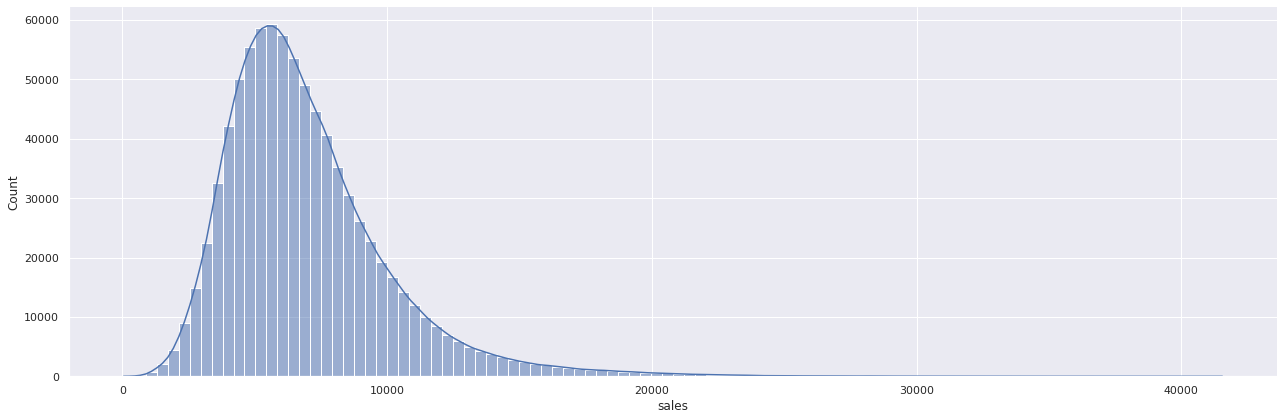

In [96]:
sns.displot(df_eda['sales'], height=6, aspect=3, kde=True, bins=100);

### 5.1.2. Numerical Variables

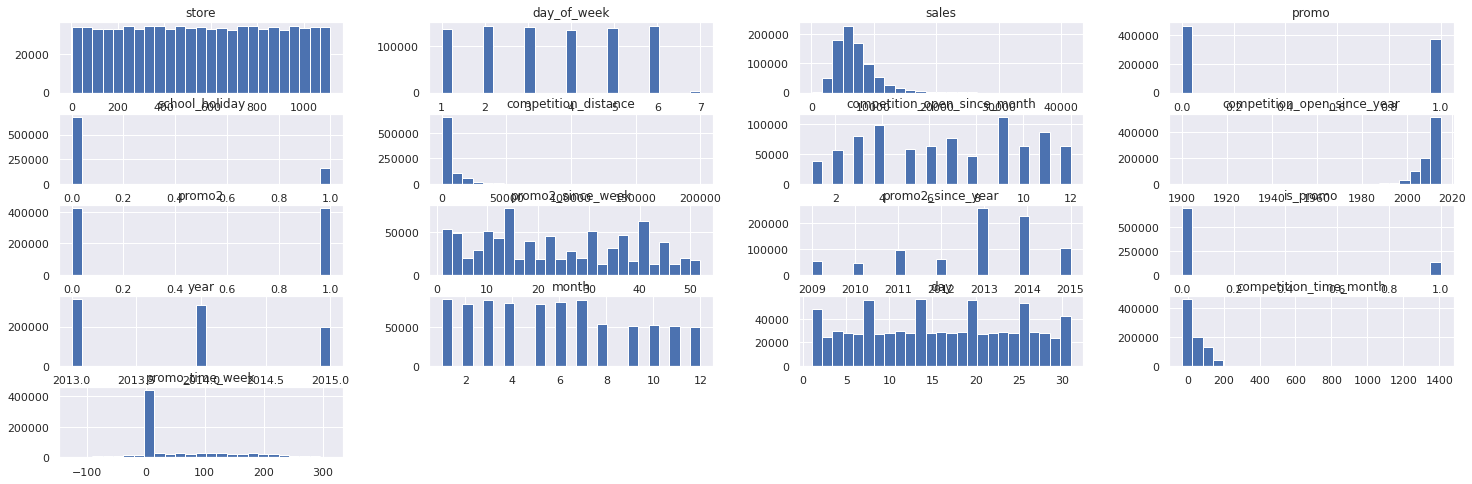

In [97]:
num_attributes.hist(bins=25);

### 5.1.3.Categorical Variables

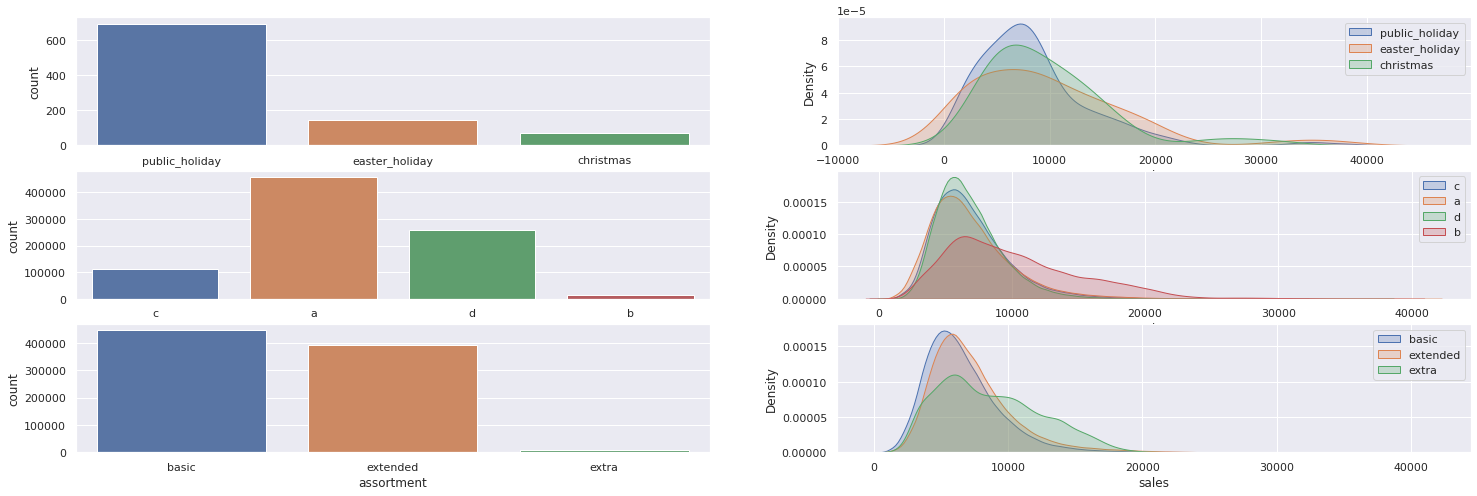

In [98]:
# state_holiday
# as we have a concentration of sales on "regular_day", we will exclude this category for this holiday analysis
plt.subplot(3, 2, 1)
sns.countplot(x='state_holiday', data=df_eda[df_eda['state_holiday'] != 'regular_day'])

fig = plt.subplot(3, 2, 2)
sns.kdeplot(df_eda[df_eda['state_holiday']=='public_holiday']['sales'], label='public_holiday', fill=True)
sns.kdeplot(df_eda[df_eda['state_holiday']=='easter_holiday']['sales'], label='easter_holiday', fill=True)
sns.kdeplot(df_eda[df_eda['state_holiday']=='christmas']['sales'], label='christmas', fill=True);
fig.legend()

# store_type
plt.subplot(3, 2, 3)
sns.countplot(x='store_type', data=df_eda)

fig = plt.subplot(3, 2, 4)
sns.kdeplot(df_eda[df_eda['store_type']=='c']['sales'], label='c', fill=True)
sns.kdeplot(df_eda[df_eda['store_type']=='a']['sales'], label='a', fill=True)
sns.kdeplot(df_eda[df_eda['store_type']=='d']['sales'], label='d', fill=True)
sns.kdeplot(df_eda[df_eda['store_type']=='b']['sales'], label='b', fill=True)
fig.legend();

# assortment
plt.subplot(3, 2, 5)
sns.countplot(x='assortment', data=df_eda)

fig = plt.subplot(3, 2, 6)
sns.kdeplot(df_eda[df_eda['assortment']=='basic']['sales'], label='basic', fill=True)
sns.kdeplot(df_eda[df_eda['assortment']=='extended']['sales'], label='extended', fill=True)
sns.kdeplot(df_eda[df_eda['assortment']=='extra']['sales'], label='extra', fill=True);
fig.legend();

## 5.2. Bivariate Analysis

### Hypothesis 1. Stores with more assortment should sell more.

**FALSE** Stores with assortment types Basic and Extended have similar total amount of sales, while Extra stores have the lowest total amount of sales. Although, it is fair to mention that stores with assortment type Extra have the highest average sale, the reason they have the lowest total amount of sales in this dataset is due to the different amount of rows of each store type in the dataset 

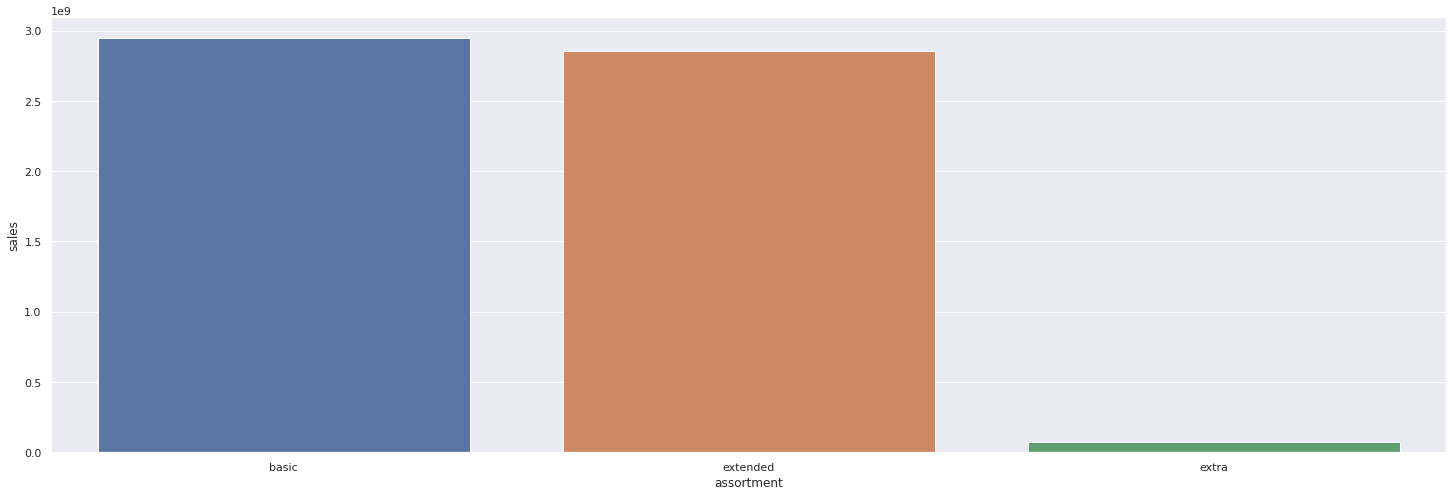

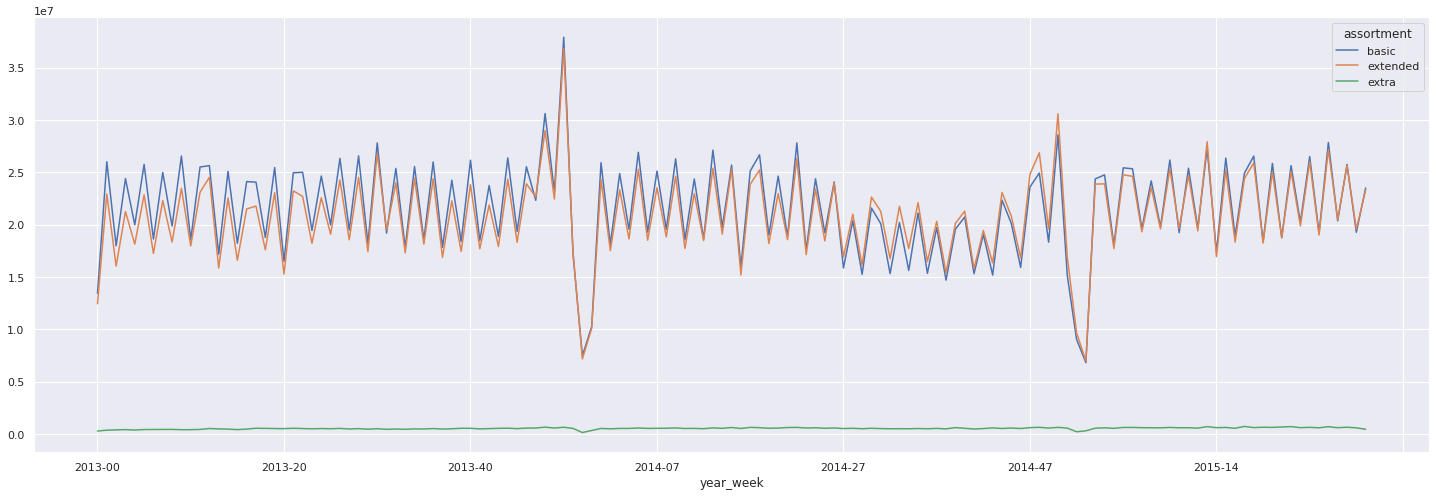

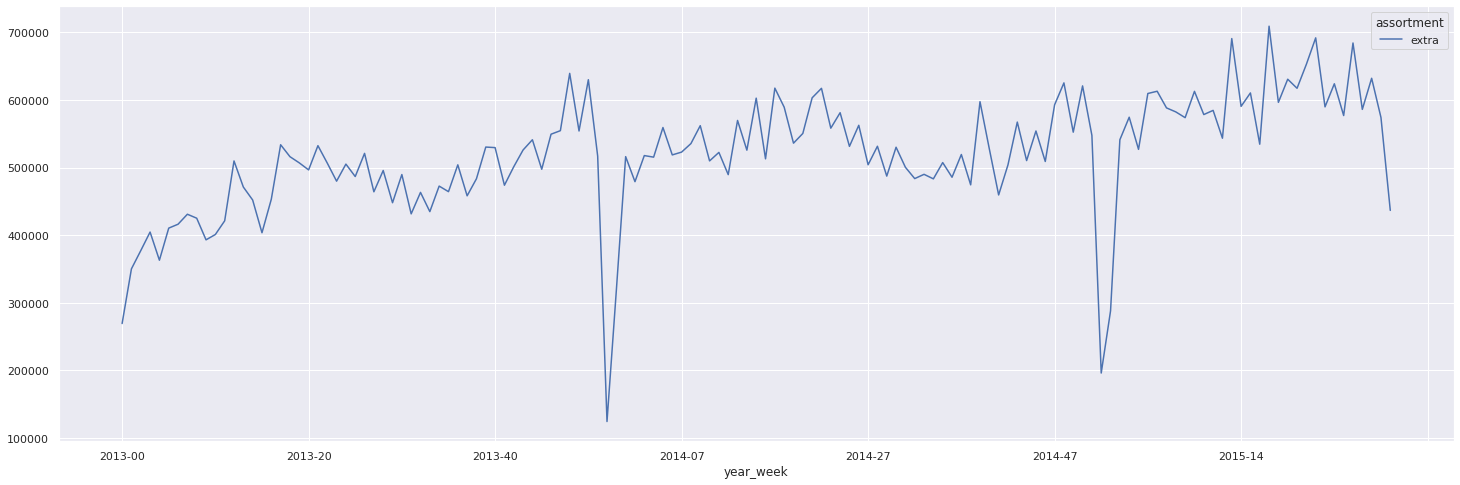

In [99]:
df_h1_aux = df_eda.groupby('assortment')['sales'].sum().reset_index()
sns.barplot(x='assortment', y='sales', data=df_h1_aux);

df_h1_aux = df_eda.groupby(['year_week', 'assortment'])['sales'].sum().reset_index()
df_h1_aux.pivot(index='year_week', columns='assortment', values='sales').plot();

df_h1_aux = df_h1_aux[df_h1_aux['assortment'] == 'extra']
df_h1_aux.pivot(index='year_week', columns='assortment', values='sales').plot();

With these graphs, we can see that the higher volume of sales are from basic and extended stores, both have a very similar sales behaviour. The extra stores have a considerably lower volume of sales, but also have some variance through time. Let's see the average sales amount by store assortment type to check if this behaviour stays the same.

Number of Rows:
Basic: 444875
Extended: 391254
Extra: 8209


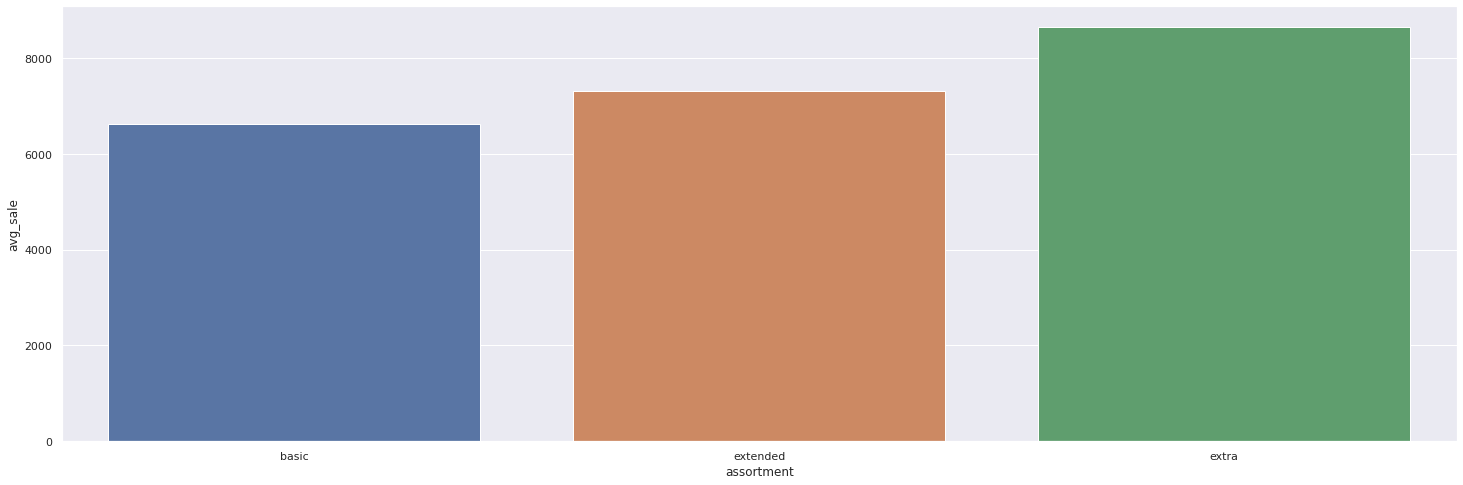

In [135]:
df_h1_aux = df_eda.groupby('assortment').agg({'sales': 'sum', 'assortment': 'count'})
# change column name
columns_names = list(df_h1_aux.columns)
columns_names[1] = 'count'
df_h1_aux.columns = columns_names
df_h1_aux = df_h1_aux.reset_index()
print('Number of Rows:\n' + 
      'Basic: ' + str(df_h1_aux['count'][0]) + 
      '\nExtended: ' + str(df_h1_aux['count'][1]) +
      '\nExtra: ' + str(df_h1_aux['count'][2]))
# calculate average sales
df_h1_aux['avg_sale'] = df_h1_aux['sales']/df_h1_aux['count']
sns.barplot(x='assortment', y='avg_sale', data=df_h1_aux);

We can see that Extra assortment type stores have the highest average sale, followed by extended and basic, but have significant less rows on the dataset, which explains the lower total volume of sales.

### Hypothesis 2. Stores with more competitors near should sell less.

### Hypothesis 3. Stores with competitors for longer periods should sell more.

## 5.3. Multivariate Analysis